# 🔍 TNEA Cutoff Analysis (2022–2024)

This notebook performs Exploratory Data Analysis (EDA) on Tamil Nadu Engineering Admissions (TNEA) cutoff data for 3 years (2022–2024). The goal is to:
- Understand trends in cutoffs
- Visualize cutoff patterns
- Prepare data for classification and ML models


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Seaborn style
sns.set(style="whitegrid")


In [3]:
# Load each year's file
df_2022 = pd.read_csv("tnea_cutoff_data_2022_cleaned_sorted.csv")
df_2023 = pd.read_csv("tnea_cutoff_data_2023_cleaned_sorted.csv")
df_2024 = pd.read_csv("tnea_cutoff_data_2024_cleaned_sorted.csv")

# Add Year column
df_2022["Year"] = 2022
df_2023["Year"] = 2023
df_2024["Year"] = 2024

# Combine into one dataframe
df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

# Save combined
df.to_csv("tnea_cutoff_combined.csv", index=False)
df.head()


,College Code,College Name,Branch Code,Branch Name,OC,BC,BCM,MBC,MBCDNC,MBCV,SC,SCA,ST,Year
0,1,"University Departments of Anna University, Che...",CS,COMPUTER SCIENCE AND ENGINEERING,200.0,200.0,199.0,199.333333,NaN,NaN,197.5,197.5,NaN,2022
1,1,"University Departments of Anna University, Che...",CM,COMPUTER SCIENCE AND ENGINEERING (SS),199.5,199.5,198.0,198.500000,NaN,NaN,194.5,189.5,189.0,2022
2,1,"University Departments of Anna University, Che...",EC,ELECTRONICS AND COMMUNICATION ENGINEERING,199.5,199.0,198.0,198.000000,NaN,NaN,194.0,185.0,NaN,2022
3,2006,"PSG College of Technology (Autonomous), Peelam...",CM,COMPUTER SCIENCE AND ENGINEERING (SS),199.5,198.5,197.0,196.500000,NaN,NaN,186.0,178.0,185.0,2022
4,1,"University Departments of Anna University, Che...",IM,INFORMATION TECHNOLOGY (SS),199.0,198.5,197.5,196.500000,NaN,NaN,192.0,187.5,185.0,2022


## 🗂️ Dataset Overview

Let's take a look at the structure of the data and the key columns:
- College Code, College Name
- Branch Code, Branch Name
- OC, BC, BCM, MBC, MBCDNC, MBCV, SC, SCA, ST
- Year


In [4]:
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())

# Unique counts
print("\nUnique Colleges:", df['College Name'].nunique())
print("Unique Branches:", df['Branch Name'].nunique())
print("Years:", df['Year'].unique())


Shape of dataset: (4184, 14)

Columns: ['College Code', 'College Name', 'Branch Code', 'Branch Name', 'OC', 'BC', 'BCM', 'MBC', 'MBCDNC', 'MBCV', 'SC', 'SCA', 'ST', 'Year']

Unique Colleges: 730
Unique Branches: 108
Years: [2022 2023 2024]


<Axes: >

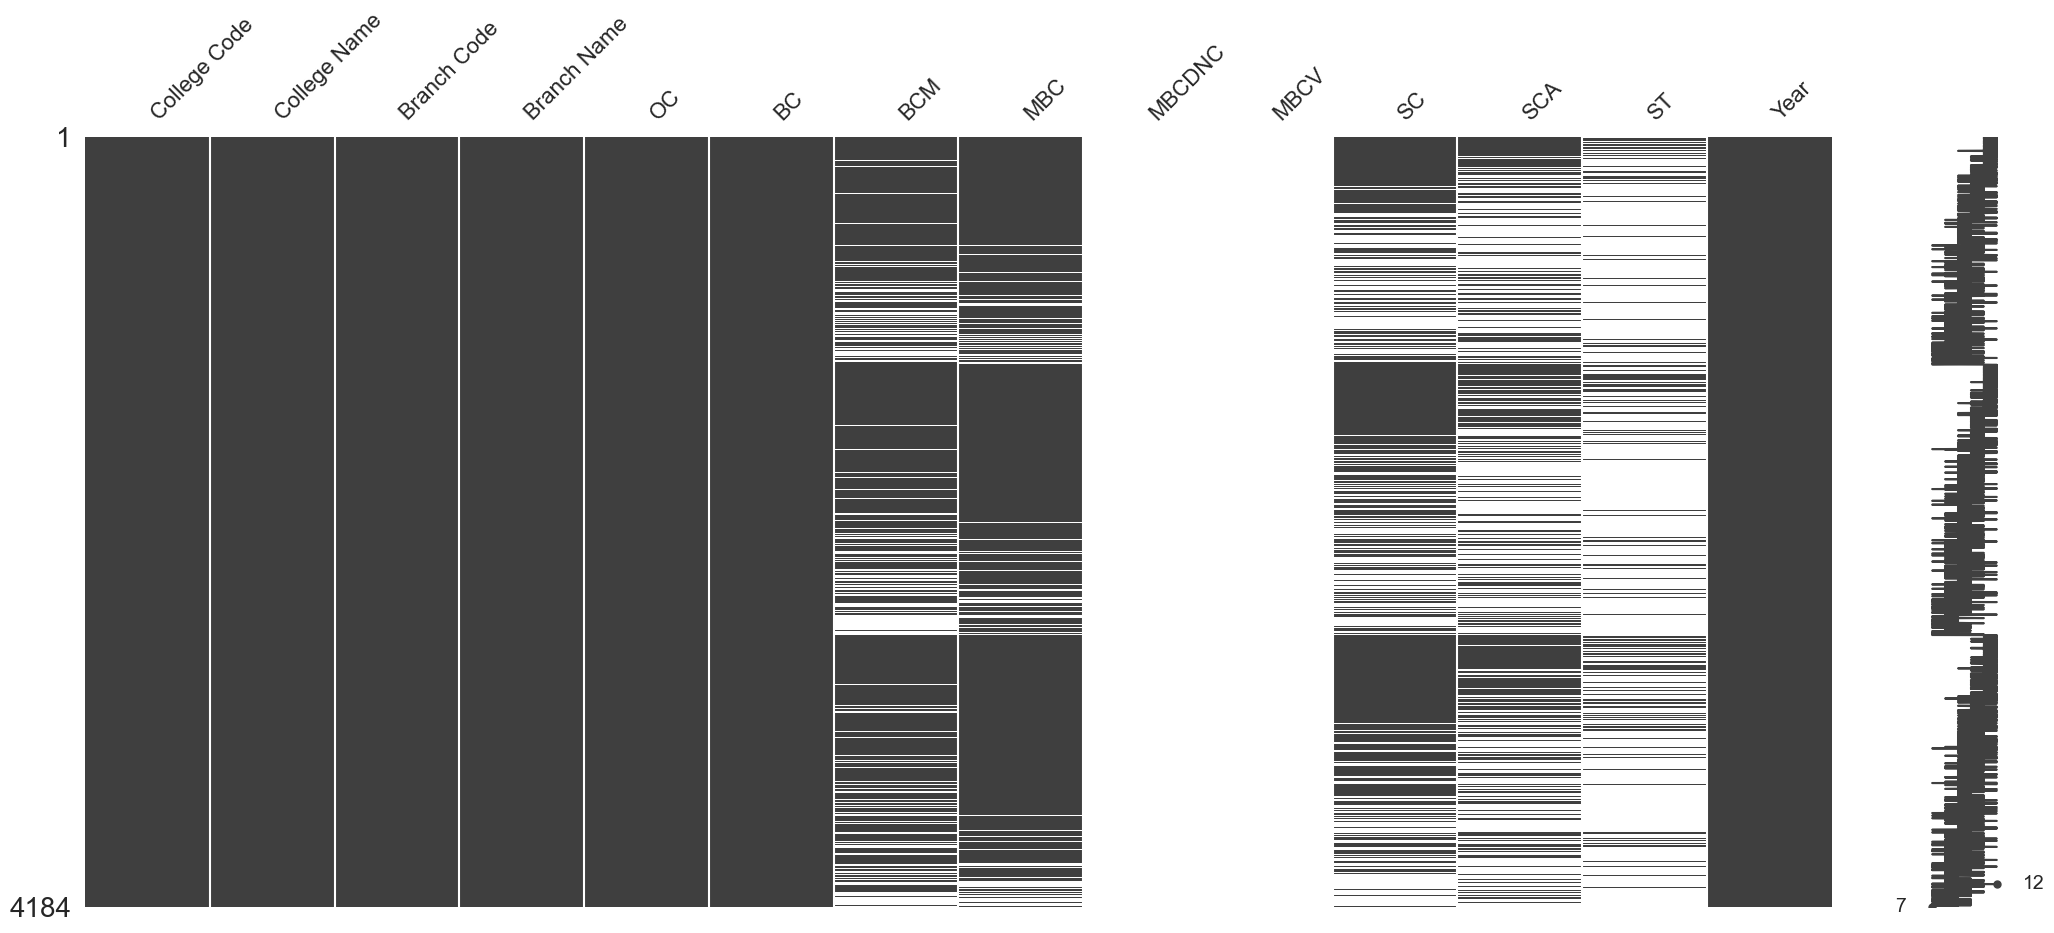

In [5]:
# Replace '*' or '***' with NaN if not already done
df.replace(['*', '***'], np.nan, inplace=True)

# Convert all cutoff columns to numeric
cutoff_columns = ['OC', 'BC', 'BCM', 'MBC', 'MBCDNC', 'MBCV', 'SC', 'SCA', 'ST']
df[cutoff_columns] = df[cutoff_columns].apply(pd.to_numeric, errors='coerce')

# Missing values heatmap
import missingno as msno
msno.matrix(df)


## 🎯 Cutoff Score Distributions

We'll now visualize the distribution of cutoff scores across different categories.


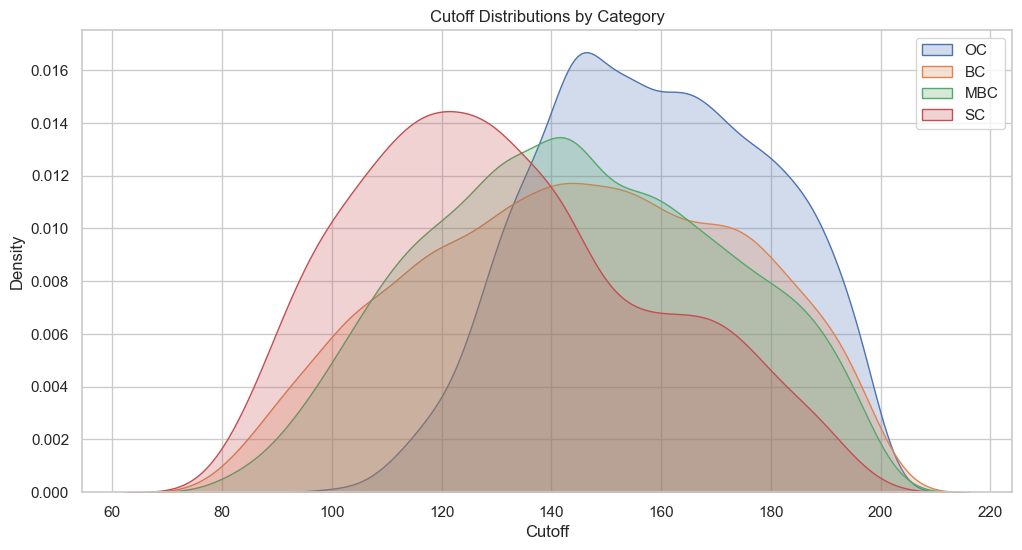

In [6]:
plt.figure(figsize=(12, 6))
for col in ['OC', 'BC', 'MBC', 'SC']:
    sns.kdeplot(df[col], label=col, fill=True)

plt.title("Cutoff Distributions by Category")
plt.xlabel("Cutoff")
plt.ylabel("Density")
plt.legend()
plt.show()


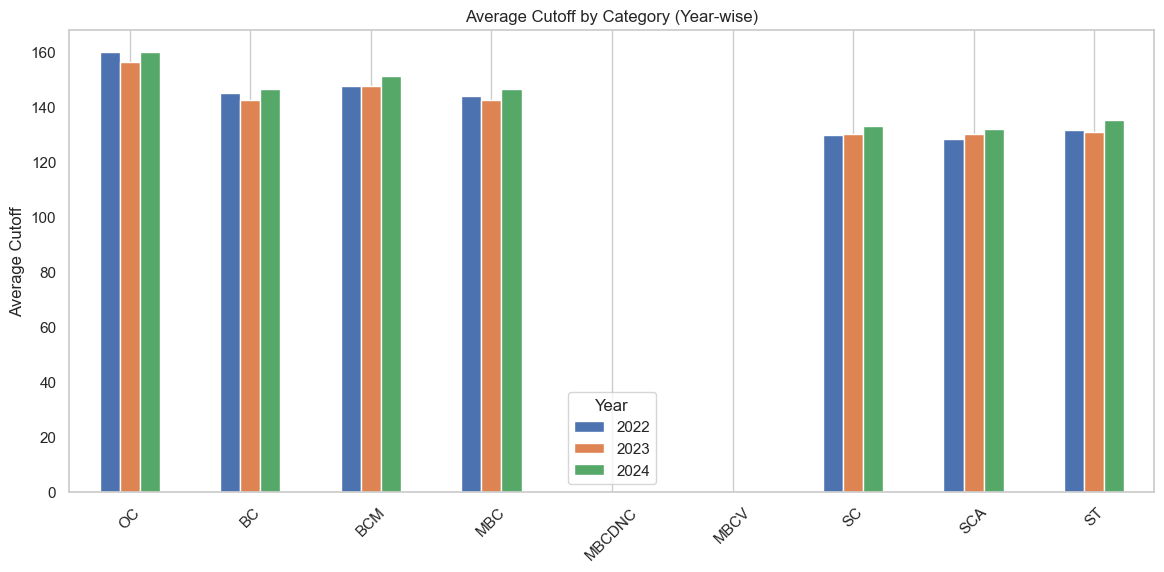

In [7]:
# Mean cutoff across all colleges per year
yearly_cutoff = df.groupby("Year")[cutoff_columns].mean()
yearly_cutoff.T.plot(kind='bar', figsize=(14,6))
plt.title("Average Cutoff by Category (Year-wise)")
plt.ylabel("Average Cutoff")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


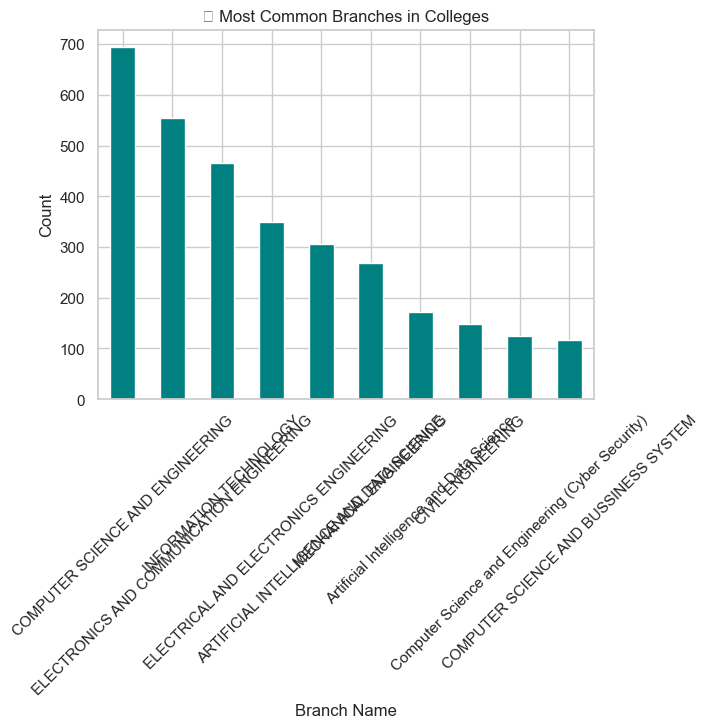

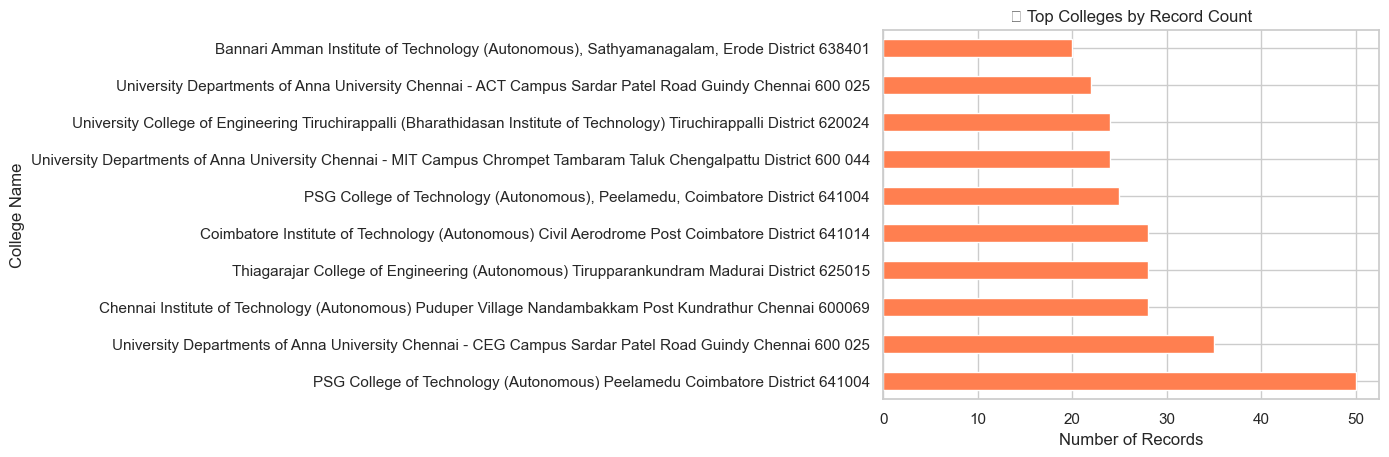

In [8]:
# Most common branches
top_branches = df['Branch Name'].value_counts().head(10)
top_branches.plot(kind='bar', color='teal')
plt.title("🔧 Most Common Branches in Colleges")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Most represented colleges
top_colleges = df['College Name'].value_counts().head(10)
top_colleges.plot(kind='barh', color='coral')
plt.title("🏫 Top Colleges by Record Count")
plt.xlabel("Number of Records")
plt.show()


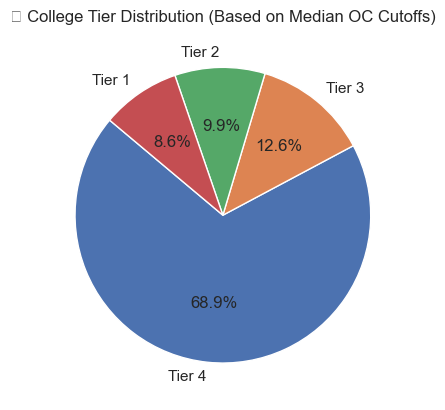

In [9]:
# Compute median OC cutoff per college
tier_df = df.groupby('College Name')['OC'].median().reset_index()
tier_df.rename(columns={'OC': 'Median_OC'}, inplace=True)

# Updated tier classification logic
def classify_tier(row):
    if row['Median_OC'] >= 180:
        return "Tier 1"
    elif row['Median_OC'] >= 170:
        return "Tier 2"
    elif row['Median_OC'] >= 160:
        return "Tier 3"
    else:
        return "Tier 4"

tier_df['Tier'] = tier_df.apply(classify_tier, axis=1)

# Plot pie chart of college tier distribution
tier_df['Tier'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("🎓 College Tier Distribution (Based on Median OC Cutoffs)")
plt.ylabel("")
plt.show()


## ✅ Summary

We now have a cleaned, combined, and visualized TNEA cutoff dataset with:
- Clear trends by year
- Cutoff distributions per category
- Tiered college classification

### 📌 Next Steps:
- Feature Engineering for Machine Learning
- Build a Ranking-Based College Recommender
- Predict future cutoffs using LSTM

👉 Let’s move to model building!


In [10]:
# Extract Tier 1 and Tier 2 colleges
tier1_colleges = tier_df[tier_df['Tier'] == 'Tier 1']['College Name'].sort_values().unique()
tier2_colleges = tier_df[tier_df['Tier'] == 'Tier 2']['College Name'].sort_values().unique()

# Display Tier 1 colleges
print(" Tier 1 Colleges:\n")
for college in tier1_colleges:
    print("-", college)

# Display Tier 2 colleges
print("\ Tier 2 Colleges:\n")
for college in tier2_colleges:
    print("-", college)


 Tier 1 Colleges:

- Alagappa Chettair Government College of Engineering and Technology (Autonomous) Karaikudi Sivagangai District 630004
- Alagappa Chettair Government College of Engineering and Technology (Autonomous), Karaikudi, Sivagangai District 630004
- Anna University Regional Campus - Coimbatore, Maruthamalai Main Road, Navavoor Bharathiyar University Post, Somayampalayam, Coimbatore District 641046
- Central Electrochemical Research Institute CECRI) Karaikudi Sivagangai District 630006
- Central Electrochemical Research Institute CECRI), Karaikudi, Sivagangai District 630006
- Chennai Institute of Technology (Autonomous) Puduper Village Nandambakkam Post Kundrathur Chennai 600069
- Chennai Institute of Technology and Applied Research Sarathy Nagar Puthuper Village Kundrathur  Chennai 600069
- Chennai Institute of Technology, Puduper Village, Nandambakkam Post, Kundrathur, Chennai 600069
- Coimbatore Institute of Technology (Autonomous) Civil Aerodrome Post Coimbatore District

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [12]:
# Load the cleaned and combined CSV
df_all = pd.read_csv("tnea_cutoff_combined.csv")

# Ensure correct data types
df_all['Year'] = df_all['Year'].astype(int)
df_all['OC'] = pd.to_numeric(df_all['OC'], errors='coerce')

# Preview
df_all.head()


,College Code,College Name,Branch Code,Branch Name,OC,BC,BCM,MBC,MBCDNC,MBCV,SC,SCA,ST,Year
0,1,"University Departments of Anna University, Che...",CS,COMPUTER SCIENCE AND ENGINEERING,200.0,200.0,199.0,199.333333,NaN,NaN,197.5,197.5,NaN,2022
1,1,"University Departments of Anna University, Che...",CM,COMPUTER SCIENCE AND ENGINEERING (SS),199.5,199.5,198.0,198.500000,NaN,NaN,194.5,189.5,189.0,2022
2,1,"University Departments of Anna University, Che...",EC,ELECTRONICS AND COMMUNICATION ENGINEERING,199.5,199.0,198.0,198.000000,NaN,NaN,194.0,185.0,NaN,2022
3,2006,"PSG College of Technology (Autonomous), Peelam...",CM,COMPUTER SCIENCE AND ENGINEERING (SS),199.5,198.5,197.0,196.500000,NaN,NaN,186.0,178.0,185.0,2022
4,1,"University Departments of Anna University, Che...",IM,INFORMATION TECHNOLOGY (SS),199.0,198.5,197.5,196.500000,NaN,NaN,192.0,187.5,185.0,2022


In [14]:
pivot_df = df_all.pivot_table(index=['College Name', 'Branch Name'], columns='Year', values='OC')

# Fill missing values using row-wise interpolation or mean
pivot_df = pivot_df[[2022, 2023, 2024]]
pivot_df = pivot_df.interpolate(axis=1, limit_direction='both')  # or use .fillna(pivot_df.mean(axis=1), axis=0)

pivot_df.dropna(inplace=True)  # In case any row is still incomplete

pivot_df.head()


Year                                                                                           2022  \
College Name                                       Branch Name                                        
A V C College of Engineering Mannampandal Post ... COMPUTER SCIENCE AND ENGINEERING           156.0   
                                                   ELECTRONICS AND COMMUNICATION ENGINEERING  142.0   
                                                   INFORMATION TECHNOLOGY                     152.0   
A V C College of Engineering, Mannampandal Post... COMPUTER SCIENCE AND ENGINEERING           169.0   
                                                   ELECTRONICS AND COMMUNICATION ENGINEERING  150.0   

Year                                                                                           2023  \
College Name                                       Branch Name                                        
A V C College of Engineering Mannampandal Post ... COMPUTER SCIENCE AND ENGINEERING           156.0   
                                                   ELECTRONICS AND COMMUNICATION ENGINEERING  142.0   
                                                   INFORMATION TECHNOLOGY                     152.0   
A V C College of Engineering, Mannampandal Post... COMPUTER SCIENCE AND ENGINEERING           169.0   
                                                   ELECTRONICS AND COMMUNICATION ENGINEERING  150.0   

Year                                                                                           2024  
College Name                                       Branch Name                                       
A V C College of Engineering Mannampandal Post ... COMPUTER SCIENCE AND ENGINEERING           156.0  
                                                   ELECTRONICS AND COMMUNICATION ENGINEERING  142.0  
                                                   INFORMATION TECHNOLOGY                     152.0  
A V C College of Engineering, Mannampandal Post... COMPUTER SCIENCE AND ENGINEERING           169.0  
                                                   ELECTRONICS AND COMMUNICATION ENGINEERING  150.0

In [15]:
X = pivot_df[[2022, 2023]].values
y = pivot_df[2024].values

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (3959, 2)
y shape: (3959,)


In [16]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape into (samples, timesteps, features)
X_lstm = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))


In [17]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_lstm.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_lstm, y, epochs=50, verbose=1)


Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 25161.1016
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22427.2949
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4848.8203
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 92.0379
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.1527
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 71.2565
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.3852
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 46.3290
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.7827
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 27.2953
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 17.0574
Epoch 12/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10.5605
Epoch 13/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.0234
Epoch 14/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.4339
Epoch 15/50
124/124 ━━━━━━━━━━━━━━━━━

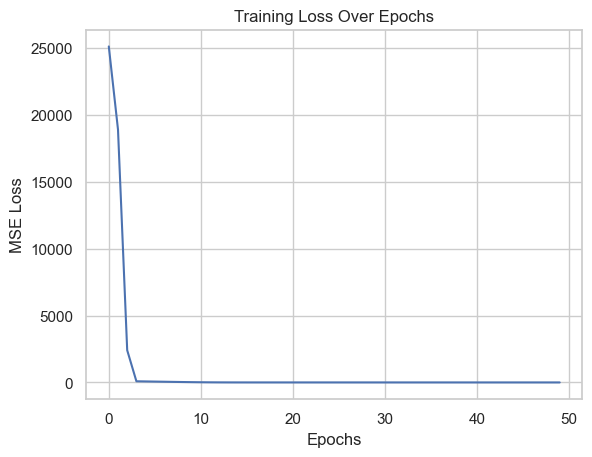

In [19]:
plt.plot(history.history['loss'])
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


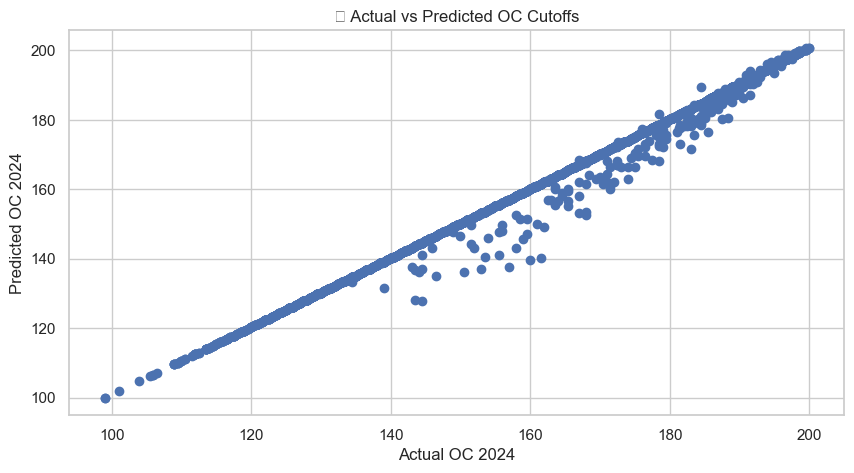

In [20]:
predictions = model.predict(X_lstm)

plt.figure(figsize=(10, 5))
plt.scatter(y, predictions)
plt.xlabel("Actual OC 2024")
plt.ylabel("Predicted OC 2024")
plt.title("📈 Actual vs Predicted OC Cutoffs")
plt.grid(True)
plt.show()
